# <span style='color:#0096FF'>**Introduction**</span>

About the dataset:  
The Kaggle Global Superstore dataset is a comprehensive dataset containing information about sales and orders in a global superstore. It is a valuable resource for data analysis and visualization tasks. This dataset has been processed and transformed from its original format (txt) to CSV using the R programming language. The transformed CSV file used in this analysis, and a description of the columns in the dataset can be found here: [Global Superstore](https://www.kaggle.com/datasets/anandaramg/global-superstore/data).


In this notebook we will analyze the **Global Superstore** dataset. The goal of this analysis is to transform the raw transactional data into meaningful insights through:

* **Data Cleaning:** correcting data types, handling missing values, fixing inconsistent entries, and preparing the dataset for analysis.
* **Feature Engineering:** creating new variables to enhance analytical depth.
* **Exploratory Data Analysis:** examining distributions, identifying patterns, and exploring relationships between variables to understand customer behavior and sales dynamics.
* **Visualization:** using Matplotlib and Seaborn to produce clear and interpretable charts that highlight key trends and findings.


# <span style='color:#0096FF'>**Loading the data**</span>

In [1]:
import numpy as np
import pandas as pd
import re

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,8)})

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('superstore.csv')

In [3]:
df = data.copy()
df

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


# <span style='color:#0096FF'>**Data cleaning**</span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

### <span style='color:#00FFFF'>**Duplicated values**</span>

In [5]:
# Checking if there are duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
# Number of distinct values per column
df.nunique()

Category              3
City               3636
Country             147
Customer.ID        4873
Customer.Name       795
Discount             27
Market                7
记录数                   1
Order.Date         1430
Order.ID          25035
Order.Priority        4
Product.ID        10292
Product.Name       3788
Profit            24575
Quantity             14
Region               13
Row.ID            51290
Sales              2246
Segment               3
Ship.Date          1464
Ship.Mode             4
Shipping.Cost     16877
State              1094
Sub.Category         17
Year                  4
Market2               6
weeknum              53
dtype: int64

In [7]:
# The column '记录数' has 1 value, so we will drop it

df = df.drop(columns='记录数')

In [8]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

### <span style='color:#00FFFF'>**Rename columns**</span>

In [9]:
# Unified Name Styles
def to_snake(name):
    name = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name)
    name = re.sub(r'[ .]+', '_', name)
    name = re.sub(r'_+', '_', name)
    return name.lower()

df.columns = [to_snake(col) for col in df.columns]
df.columns


Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', 'order_date', 'order_id', 'order_priority',
       'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id',
       'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state',
       'sub_category', 'year', 'market2', 'weeknum'],
      dtype='object')

### <span style='color:#00FFFF'>**Data types**</span>

In [10]:
# Date columns
  
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [11]:
# Looking for typos and similar values in categorical columns

from difflib import get_close_matches

results = []
categorical = ['category','city','market','order_priority','region','segment',
               'ship_mode','state','sub_category','market2','country',]

for col in categorical:
    unique_values = df[col].unique()
    processed = set()
    
    for val in unique_values:
        if val in processed:
            continue
            
        matches = get_close_matches(val, unique_values, n=10, cutoff=0.9)
        if len(matches) > 1:
            results.append({
                'column': col,
                'similar_values': ', '.join(matches)
            })
            processed.update(matches)

# Create DataFrame
typos_df = pd.DataFrame(results)
typos_df

,column,similar_values
0,city,"Los Angeles, Los Ángeles"
1,city,"San Bernardino, San Bernardo"
2,city,"Santa Maria, Santa Marta"
3,city,"Edmonds, Edmond"
4,city,"Bridgeton, Bridgetown"
5,city,"Saint Louis, Saint-Louis"
6,city,"Overland Park, Orland Park"
7,city,"Trenton, Trento"
8,city,"Apopa, Apopka"
9,city,"Venice, Vence"


### <span style='color:#00FFFF'>**Missing values**</span>

In [12]:
# Missing values
df.isna().sum().sum()

np.int64(0)

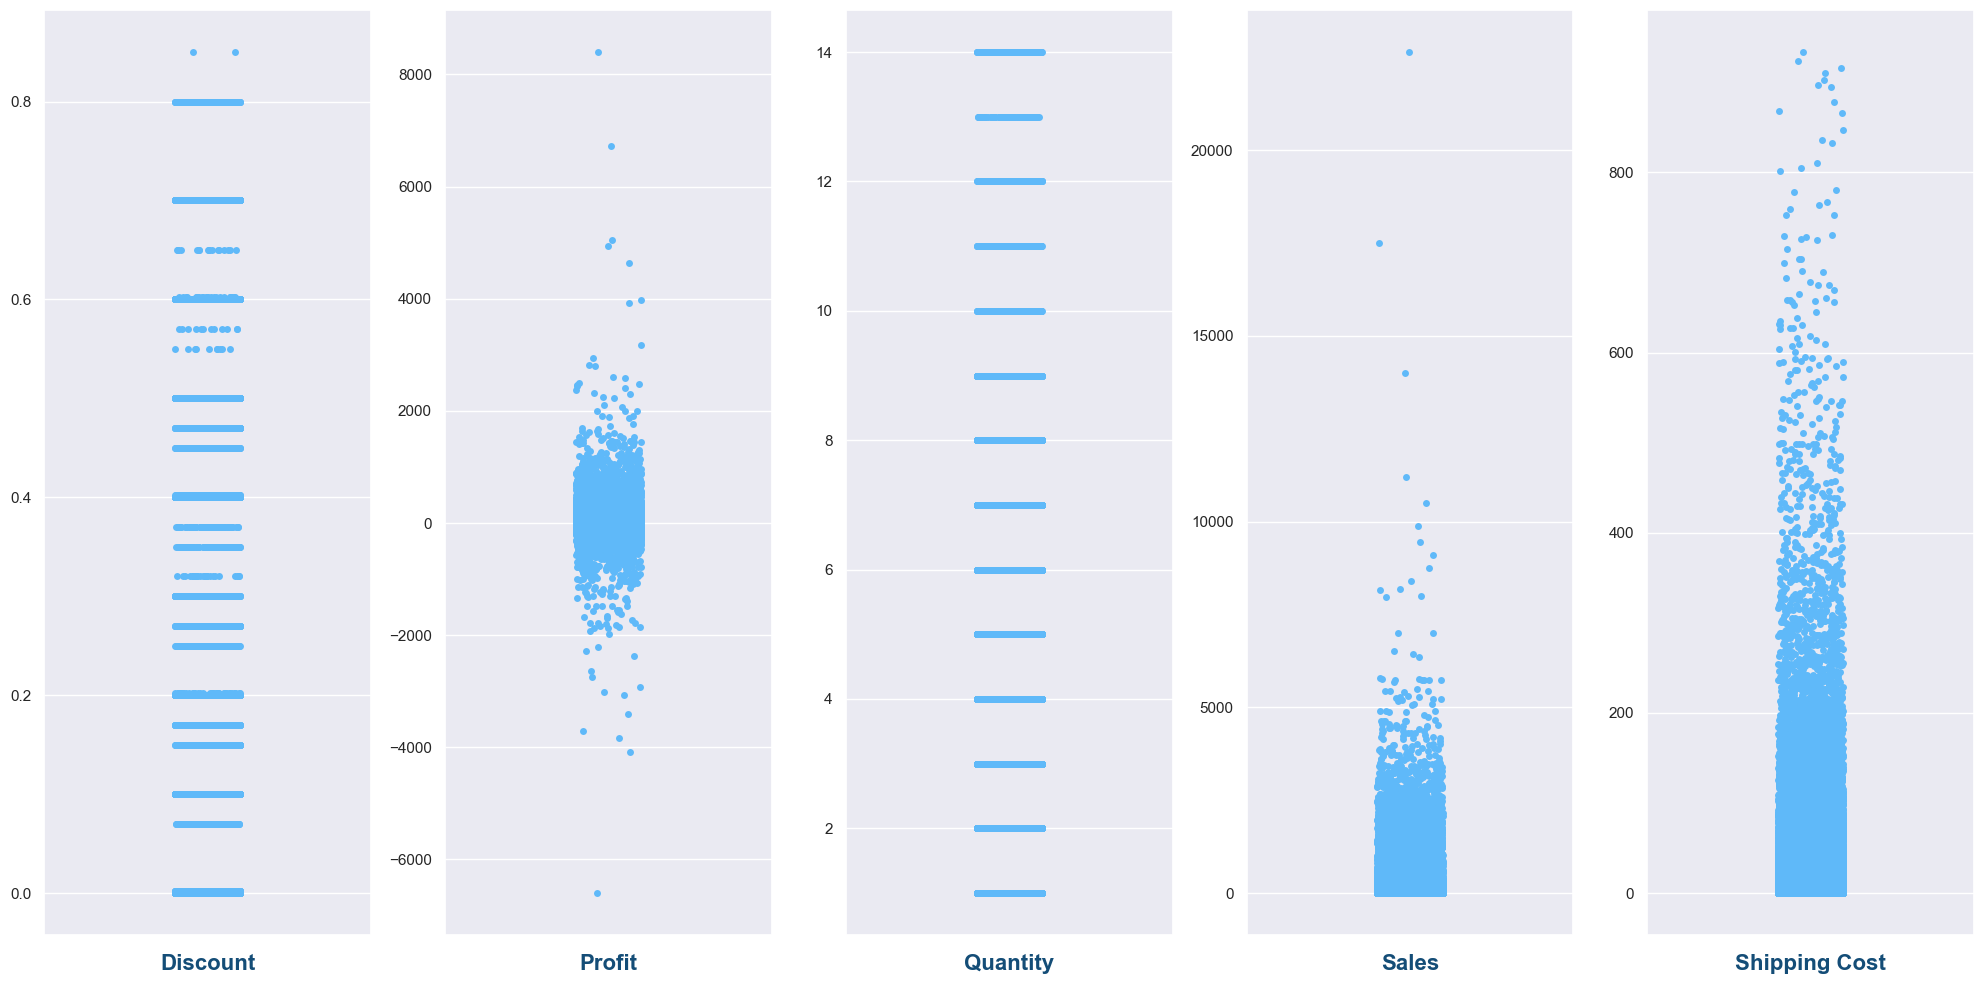

In [13]:
# Distribution of numerical columns

cols = ['discount','profit','quantity','sales','shipping_cost']
custom_names = ['Discount','Profit','Quantity','Sales','Shipping Cost']
fig, axes = plt.subplots(1, 5, figsize=(20, 10)) 
axes = axes.flatten()

for i,col in enumerate(cols):
    sns.stripplot(y=df[col],ax=axes[i],color="#5FB9F9")
    axes[i].set_xlabel(custom_names[i], fontsize=16,color="#144D77",fontweight='bold')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show();

In [14]:
# Negative values in 'profit' column

p = (100*df[df['profit']<0]['profit'].count()/df['profit'].count()).round(2)

print(f"{p}% of values are negative")

24.46% of values are negative


# <span style='color:#0096FF'>**Feature Engineering**</span>

In [15]:
# Adding new columns

# Dates
df['month'] = df['order_date'].dt.month
df['quarter'] = df['order_date'].dt.quarter
df['days_ofweek'] = df['order_date'].dt.dayofweek
df['names_ofdays'] = df['order_date'].dt.day_name()
df['days_ofmonth'] = df['order_date'].dt.day

# Order Processing Time
df['shipping_duration'] =(df['ship_date'] - df['order_date']).dt.days

# Profit Margin
df['profit_margin'] = np.where(df['sales'] != 0, df['profit'] / df['sales'], 0)

# Item Price
df['price'] =  np.where(df['quantity'] != 0, df['sales'] / df['quantity'], 0)

#  Customer Lifetime Value (Total sales & Order Count per Customer)

customer_agg = df.groupby('customer_id').agg(
    cust_tot_sales=('sales', 'sum'),          # Sum of sales for each customer
    cust_order_count=('order_id', 'nunique'),    # Count of unique orders for each customer
    cust_quantity_count=('quantity', 'sum')  

).reset_index()
df = pd.merge(df, customer_agg, on='customer_id', how='left')

# Product Performance Metrics (Total sales & Average profit per Product)

product_agg = df.groupby('product_id').agg(
    prod_tot_sales=('sales', 'sum'),           # Sum of sales for each product
    prod_avg_profit=('profit', 'mean')           # Average profit for each product
).reset_index()
df = pd.merge(df, product_agg, on='product_id', how='left')

# Customer Recency (Days since last order for each customer's subsequent orders)
df = df.sort_values(by=['customer_id', 'order_date'])
df['previous_order_date'] = df.groupby('customer_id')['order_date'].shift(1)
df['days_since_last_order'] = (df['order_date'] - df['previous_order_date']).dt.days
df.drop(columns=['previous_order_date'], inplace=True) # Clean up the helper column

# Average sales & profit per category/segment
df['category_avg_sales'] = df.groupby('category')['sales'].transform('mean')
df['category_avg_profit'] = df.groupby('category')['profit'].transform('mean')

df['segment_avg_sales'] = df.groupby('segment')['sales'].transform('mean')
df['segment_avg_profit'] = df.groupby('segment')['profit'].transform('mean')

# <span style='color:#0096FF'>**Exploratory Data Analysis**</span>

In [16]:
df.describe()

,discount,order_date,profit,quantity,row_id,sales,ship_date,shipping_cost,year,weeknum,...,cust_tot_sales,cust_order_count,cust_quantity_count,prod_tot_sales,prod_avg_profit,days_since_last_order,category_avg_sales,category_avg_profit,segment_avg_sales,segment_avg_profit
count,51290.000000,51290,51290.000000,51290.000000,51290.00000,51290.000000,51290,51290.000000,51290.000000,51290.000000,...,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,46417.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,2013-05-11 21:26:49.155780864,28.610982,3.476545,25645.50000,246.498440,2013-05-15 20:42:42.745174528,26.375818,2012.777208,31.287112,...,3708.881985,6.836011,52.573211,1586.003100,28.610982,88.388371,246.498440,28.610982,246.498440,28.610982
min,0.000000,2011-01-01 00:00:00,-6599.978000,1.000000,1.00000,0.000000,2011-01-03 00:00:00,0.002000,2011.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,-3839.990400,0.000000,121.105426,16.578961,245.423524,28.254008
25%,0.000000,2012-06-19 00:00:00,0.000000,2.000000,12823.25000,31.000000,2012-06-23 00:00:00,2.610000,2012.000000,20.000000,...,1614.000000,5.000000,30.000000,246.000000,0.000000,0.000000,121.105426,16.578961,245.423524,28.254008
50%,0.000000,2013-07-08 00:00:00,9.240000,3.000000,25645.50000,85.000000,2013-07-12 00:00:00,7.790000,2013.000000,33.000000,...,3094.000000,7.000000,50.000000,664.000000,9.175800,0.000000,121.105426,16.578961,245.423524,28.254008
75%,0.200000,2014-05-22 00:00:00,36.810000,5.000000,38467.75000,251.000000,2014-05-26 00:00:00,24.450000,2014.000000,44.000000,...,5127.000000,9.000000,70.000000,1812.000000,34.432800,112.000000,416.249899,28.878567,247.897336,28.596042
max,0.850000,2014-12-31 00:00:00,8399.976000,14.000000,51290.00000,22638.000000,2015-01-07 00:00:00,933.570000,2014.000000,53.000000,...,25042.000000,18.000000,155.000000,61600.000000,5039.985600,1435.000000,467.872103,65.454958,247.897336,29.648847
std,0.212280,NaN,174.340972,2.278766,14806.29199,487.567175,NaN,57.296810,1.098931,14.429795,...,2783.715121,2.857395,29.307938,2525.191837,123.457703,164.861487,157.561000,18.886239,1.134042,0.512028


### <span style='color:#00FFFF'>**Overall Performance & profitability**</span>

In [17]:
# What are the total sales and profit of the Superstore?

total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
print(f"Total sales: {total_sales:.2f}")
print(f"Total profit: {total_profit:.2f}")

Total sales: 12642905.00
Total profit: 1467457.29


In [18]:
# What is the average profit Margin?

avg_profit_margin = df['profit_margin'].mean()
print(f"Average profit Margin: {avg_profit_margin:.2%}")

Average profit Margin: 4.72%


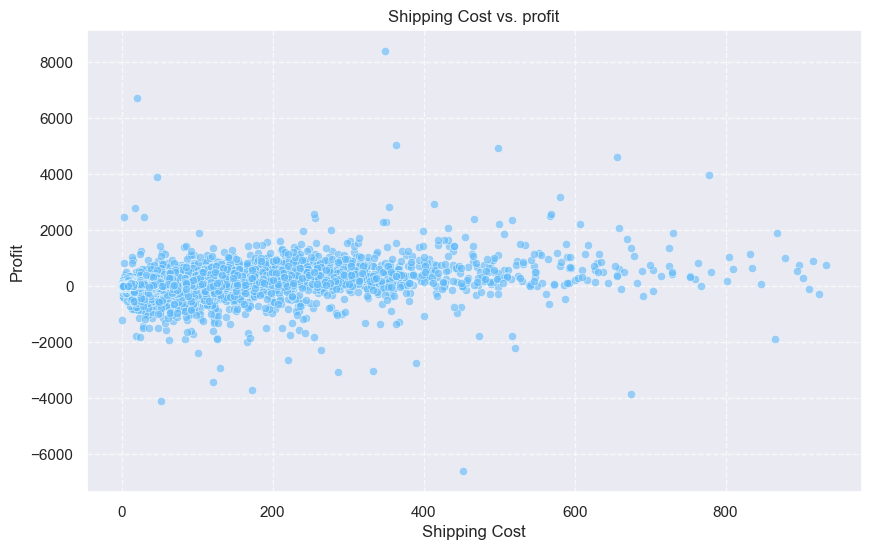

In [19]:
# How does shipping_cost relate to profit?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_cost', y='profit', data=df, alpha=0.6, color='#5FB9F9')
plt.title('Shipping Cost vs. profit')
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The relationship between `shipping cost` and `profit` is weak, showing a wide scatter with no clear linear trend.  
Profit values vary heavily at all shipping-cost levels, indicating little direct association between the two variables.


### <span style='color:#00FFFF'>**Sales & Profit Trends (Time-based)**</span>

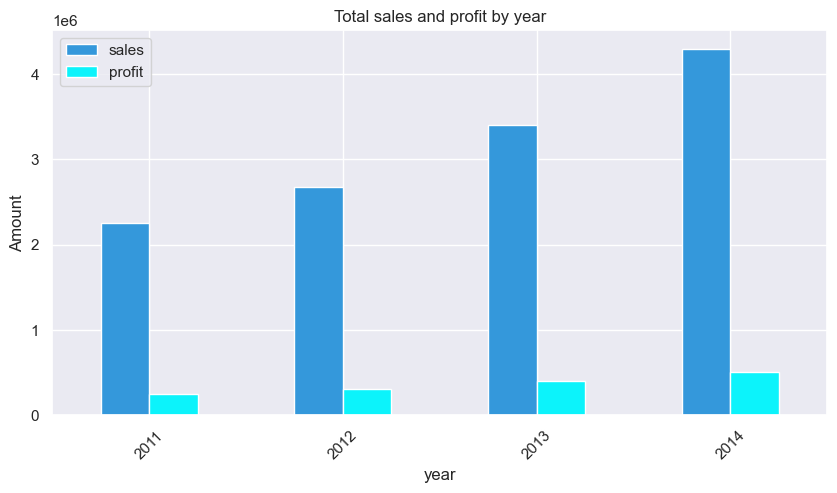

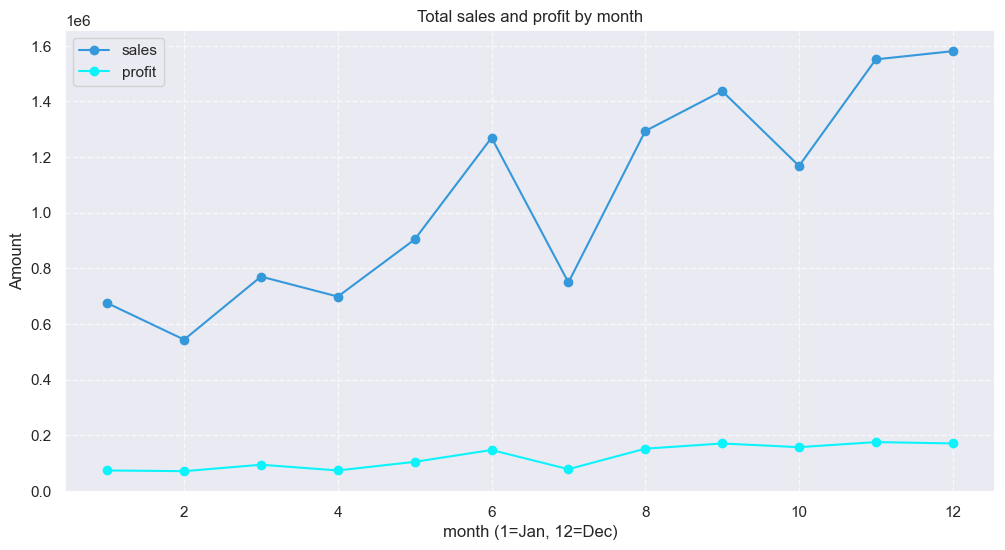

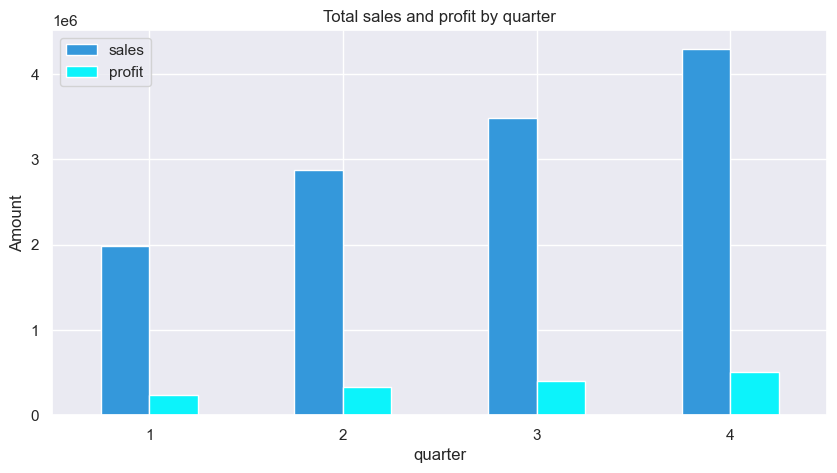

In [20]:
# How do sales and profit change over year, month, and quarter? (Are there specific periods that perform better?)

# By year
df.groupby('year')[['sales', 'profit']].sum().plot(kind='bar', figsize=(10, 5), color=['#3498db','#0cf3fb'])
plt.title('Total sales and profit by year')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# By month
df.groupby('month')[['sales', 'profit']].sum().plot(kind='line', figsize=(12, 6), marker='o', color=['#3498db','#0cf3fb'])
plt.title('Total sales and profit by month')
plt.xlabel('month (1=Jan, 12=Dec)')
plt.ylabel('Amount')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# By quarter
df.groupby('quarter')[['sales', 'profit']].sum().plot(kind='bar', figsize=(10, 5), color=['#3498db','#0cf3fb'])
plt.title('Total sales and profit by quarter')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()


- Sales and profit show a clear upward trend over time, increasing consistently across both years and quarters.  
- Sales rise steadily through the year with clear peaks in mid-year and late months.  
- Profit follows the same pattern but at a much smaller scale, increasing gradually and peaking alongside high-sales months.


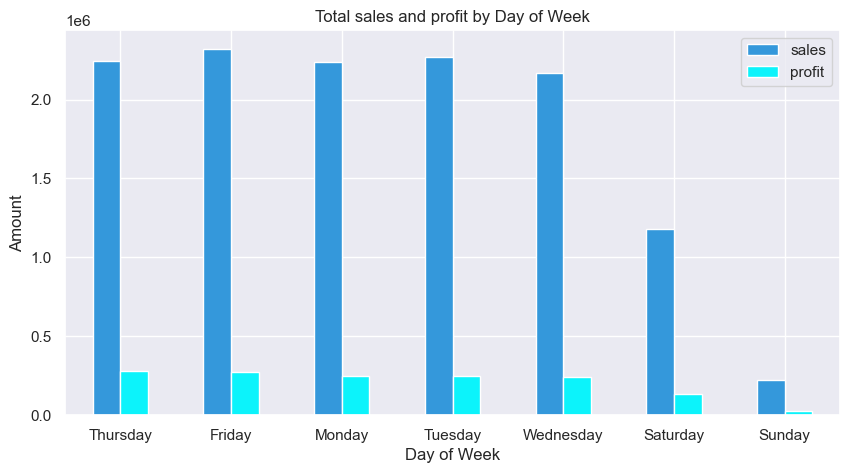

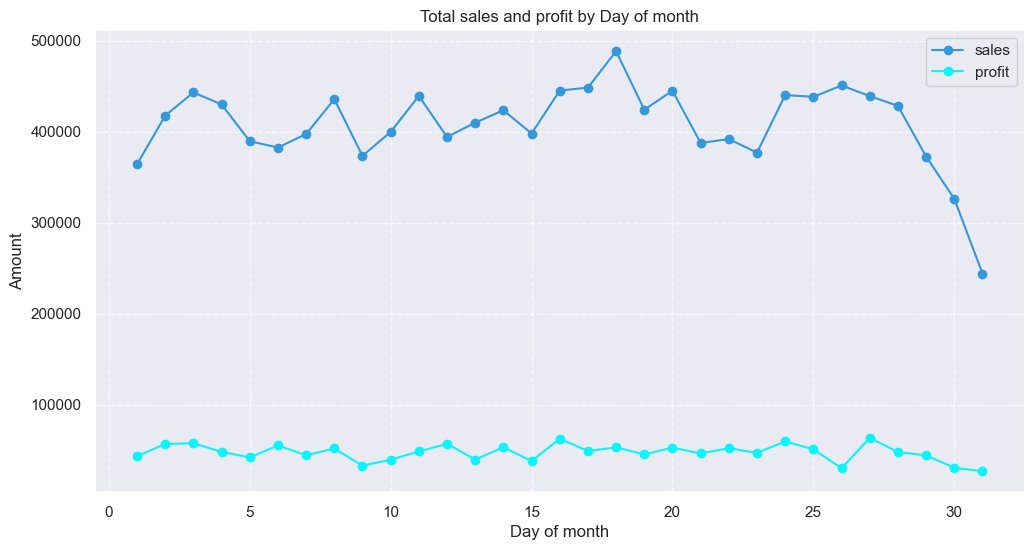

In [21]:
# Are there specific days_ofweek or days_ofmonth when sales or profit are higher or lower?

df.groupby('names_ofdays')[['sales', 'profit']].sum().sort_values('profit', ascending=False) \
  .plot(kind='bar', figsize=(10, 5), color=['#3498db','#0cf3fb'])

plt.title('Total sales and profit by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()


df.groupby('days_ofmonth')[['sales', 'profit']].sum().plot(kind='line', figsize=(12, 6), marker='o', color=['#3498db','#0cf3fb'])
plt.title('Total sales and profit by Day of month')
plt.xlabel('Day of month')
plt.ylabel('Amount')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


- Best profit days are `Thursday`, `Friday`, and `Monday`, while `Saturday` and `Sunday` show noticeably lower profit levels.
- Peak sales and profit occur mid-month (around days 10-20), with significant drops at the beginning and end of the month. Both sales and profit follow similar patterns throughout the month.

Average Order Processing Time: 3.97 days


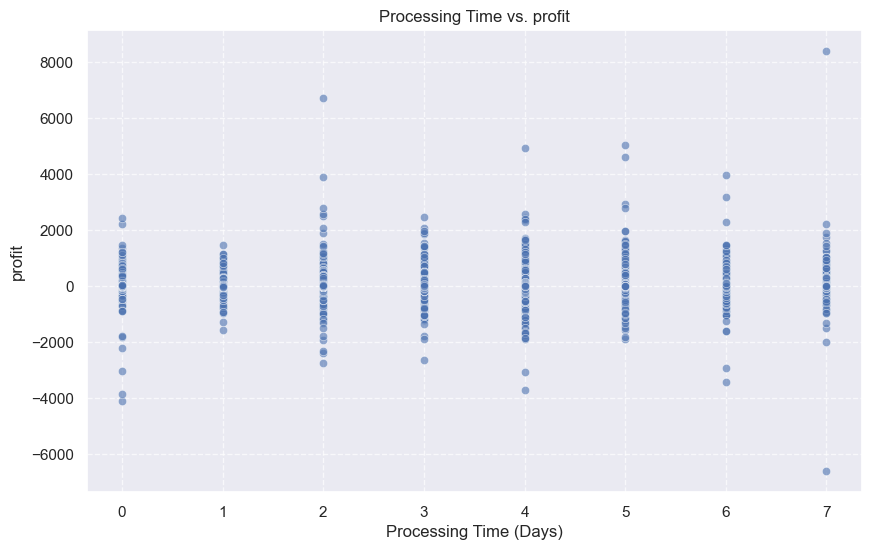

In [22]:
# What's the average shipping_duration for orders? Does it affect profit?

avg_processing_time = df['shipping_duration'].mean()
print(f"Average Order Processing Time: {avg_processing_time:.2f} days")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_duration', y='profit', data=df, alpha=0.6)
plt.title('Processing Time vs. profit')
plt.xlabel('Processing Time (Days)')
plt.ylabel('profit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Average Order Processing Time: ~`4 days`.

### <span style='color:#00FFFF'>**Customer Behavior**</span>

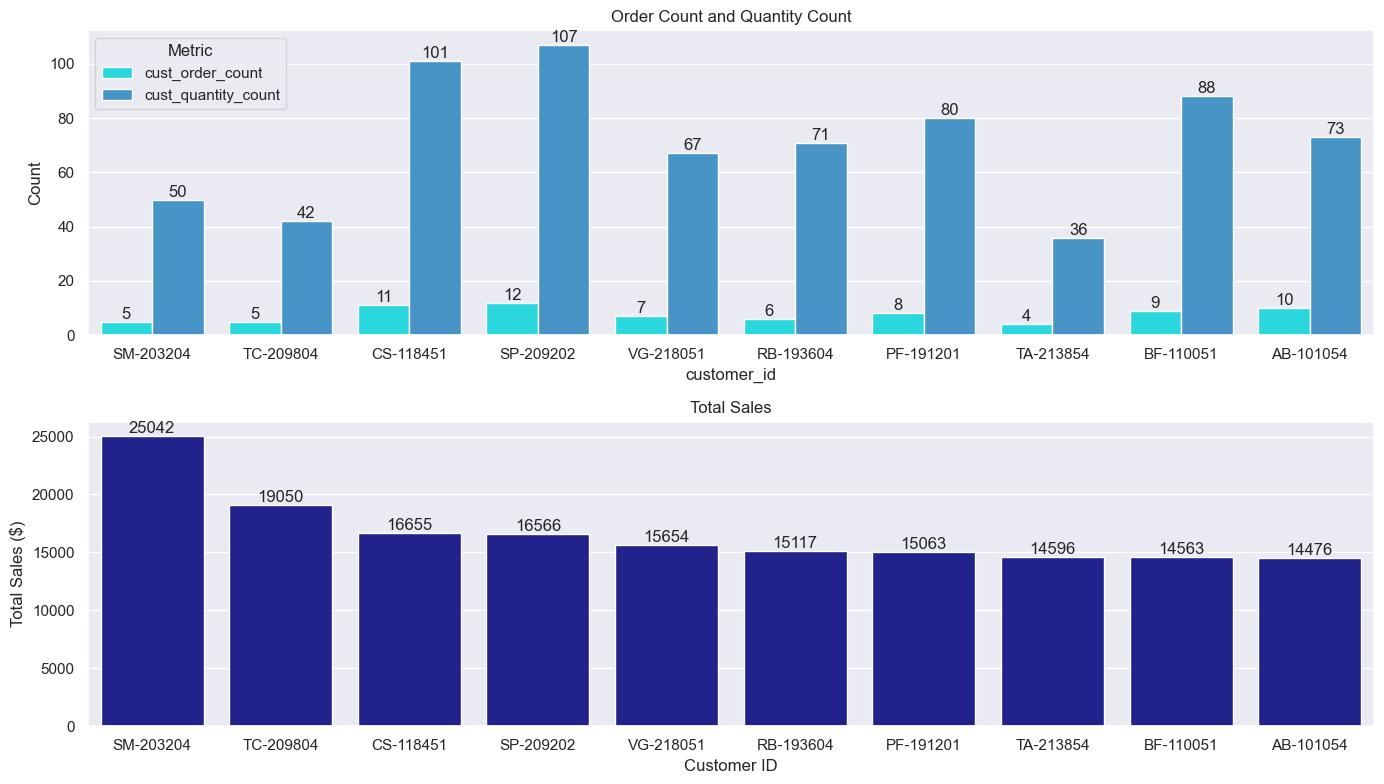

In [23]:
# Who are the top customers based on CustomerTotalsales and CustomerOrderCount?

top_customers = (
    df.groupby('customer_id')[['cust_tot_sales', 'cust_order_count','cust_quantity_count']]
      .first()  # Get the total sales and order count for each unique customer
      .sort_values(by='cust_tot_sales', ascending=False)  # Sort by Sales (highest first)
      .head(10)  # Take only the top 10 rows
)

fig, axes = plt.subplots(2, 1, sharex=False)

# Plot 1: Grouped bar for Order Count and Quantity Count
top_customers_melted = top_customers.reset_index().melt(
    id_vars=['customer_id'], 
    value_vars=['cust_order_count', 'cust_quantity_count'],
    var_name='metric', 
    value_name='count'
)

sns.barplot(
    data=top_customers_melted, x='customer_id', y='count', hue='metric',
    ax=axes[0], palette=["#0cf3fb", "#3498db"]
)
axes[0].set_title("Order Count and Quantity Count")
axes[0].set_ylabel('Count')
axes[0].legend(title='Metric')

# Plot 2: Total Sales
sns.barplot(
    data=top_customers, x=top_customers.index, y='cust_tot_sales',
    ax=axes[1], color="#11119d"
)
axes[1].set_title("Total Sales")
axes[1].set_xlabel('Customer ID')
axes[1].set_ylabel('Total Sales ($)')

# Add bar labels
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f')
axes[1].bar_label(axes[1].containers[0], fmt='%.0f')

plt.tight_layout()
plt.show()

- Top customers based on Sales: `SM-203204`, `TC-209804`, `CS-118451`, and `SP-209202`.  
- Top customers based on Order count:`SP-209202`, `CS-118451`, and `BF-110051`.  
- Top customers based on Quantity count:`SP-209202`, `CS-118451`, and `AB-101054`.  

High total sales don't necessarily correlate with high order counts—`SM-203204` leads in revenue with only 5 orders, suggesting larger transaction values per order, suggesting larger transaction values per order.

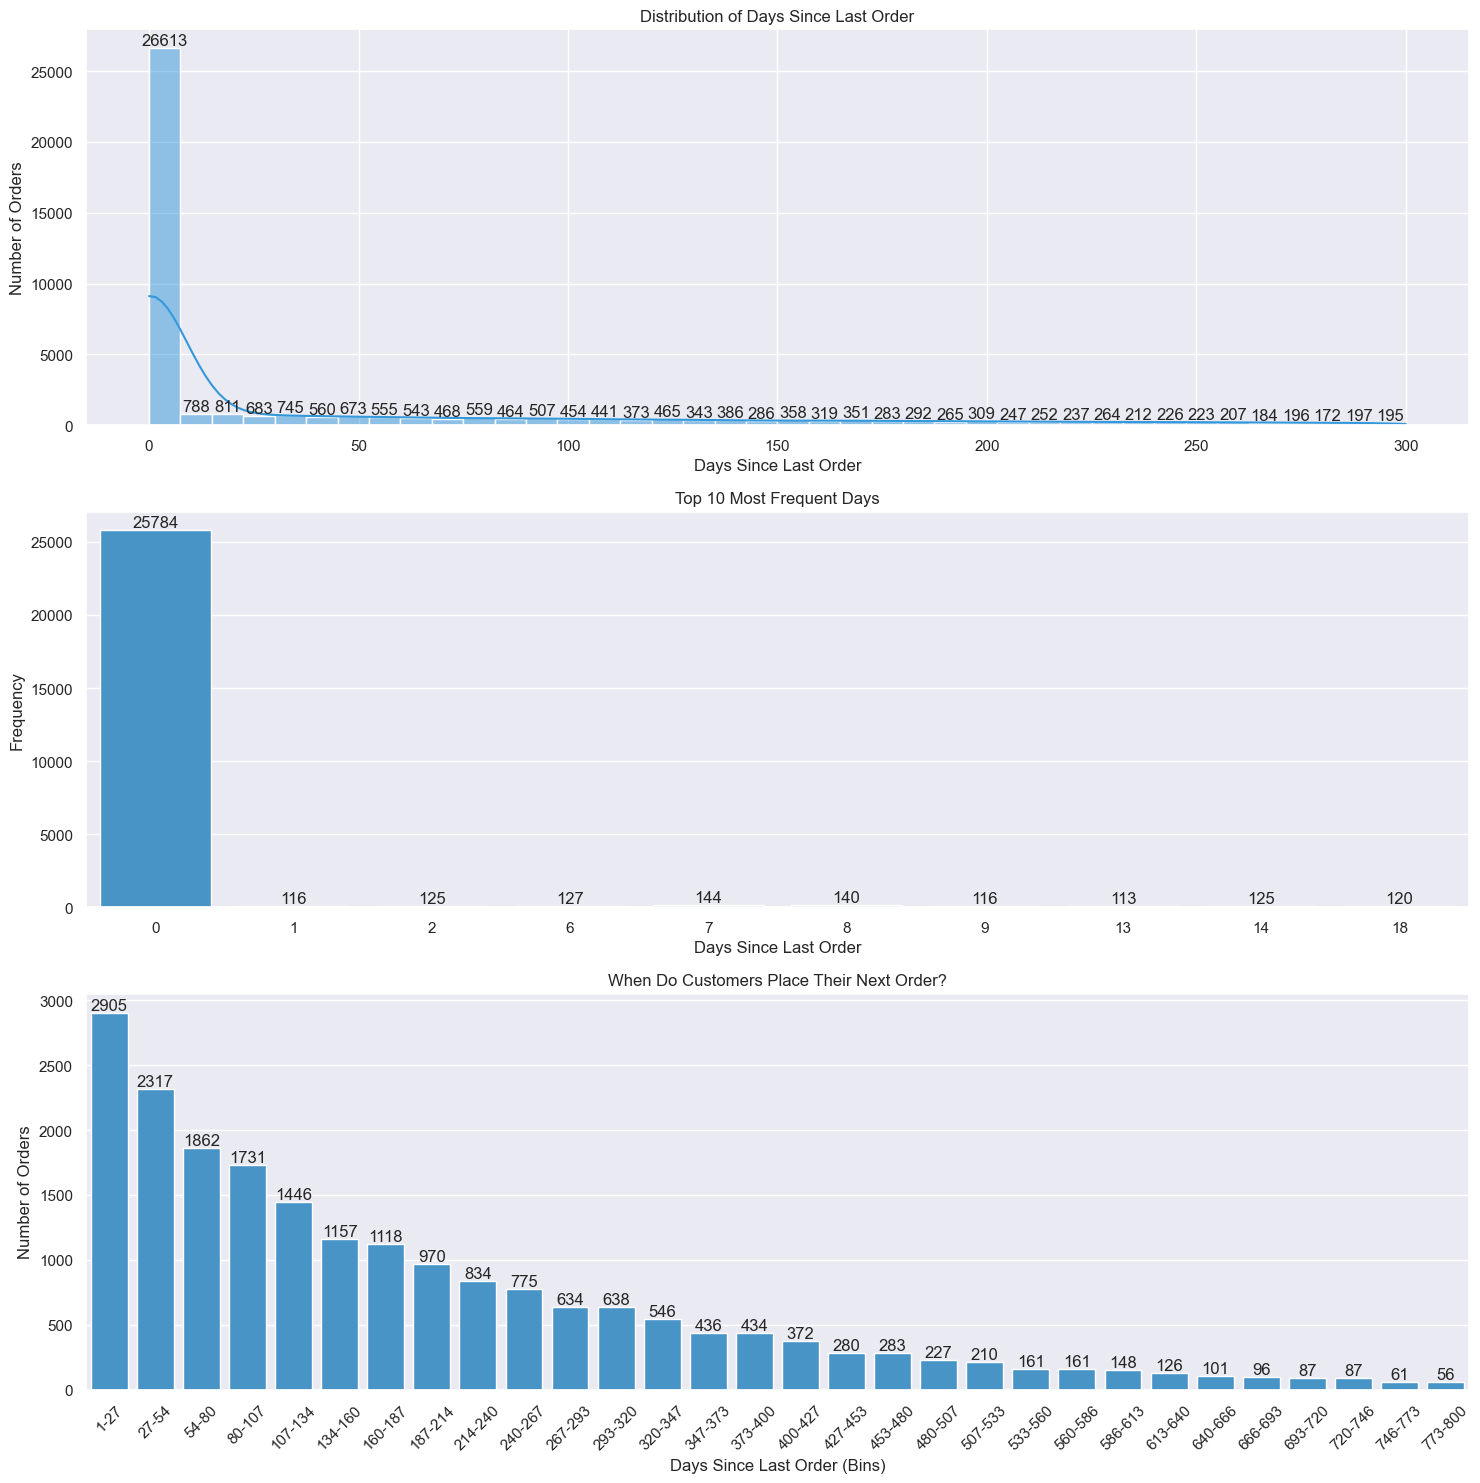

In [24]:
# How often do customers place new orders (Customer Recency)?
df0 = df[df['days_since_last_order'] <= 300]['days_since_last_order'].dropna()

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Plot 1: Distribution
sns.histplot(df0, bins=40, kde=True, color='#3498db', ax=axes[0])
axes[0].set_title('Distribution of Days Since Last Order')
axes[0].set_xlabel('Days Since Last Order')
axes[0].set_ylabel('Number of Orders')

# Plot 2: Top 10
top_10 = df0.value_counts().head(10).sort_index()
sns.barplot(x=top_10.index.astype(int), y=top_10.values, color='#3498db', ax=axes[1])
axes[1].set_title('Top 10 Most Frequent Days')
axes[1].set_xlabel('Days Since Last Order')
axes[1].set_ylabel('Frequency')

# Plot 3: Binned (excluding day 0)
df_binned = df[(df['days_since_last_order'] > 0) & (df['days_since_last_order'] <= 800)]['days_since_last_order'].dropna()
counts, bin_edges = np.histogram(df_binned, bins=30)
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]

sns.barplot(x=bin_labels, y=counts, color='#3498db', ax=axes[2])
axes[2].set_title('When Do Customers Place Their Next Order?')
axes[2].set_xlabel('Days Since Last Order (Bins)')
axes[2].set_ylabel('Number of Orders')
axes[2].tick_params(axis='x', rotation=45)

# Add bar labels to all plots
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

- Most customers place new orders within a week of their previous purchase.  
- The data shows that `25784` orders occur on the same day (day 0).  
- Excluding these same-day orders, we observe that ordering peaks around the 7th and 8th days, with approximately `140` or more orders placed during this period.   
- Overall, ordering frequency remains highest within the first 30 days after a purchase and gradually declines over time.


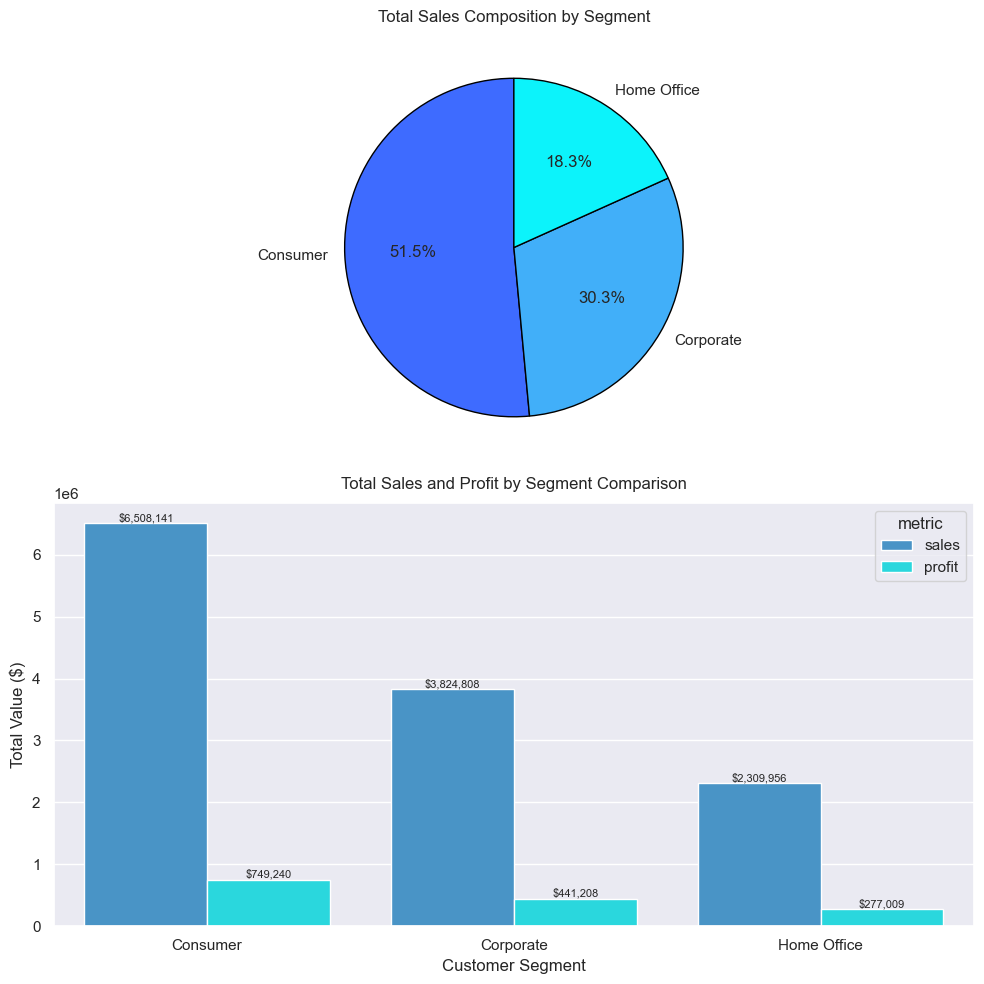

In [25]:
# Which segment brings in the most sales or profit?

pie_colors = ["#3E6BFF","#41aff9", '#0cf3fb', ]
bar_palette = {'sales': '#3498db', 'profit': '#0cf3fb'}

segment_data = df.groupby('segment')[['sales', 'profit']].sum()
plot_data = segment_data.reset_index()\
                        .melt(id_vars='segment', value_vars=['sales', 'profit'], 
                              var_name='metric', value_name='value')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

segment_data['sales'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90,
                          colors=pie_colors, wedgeprops={'edgecolor': 'black'})

ax1.set_title('Total Sales Composition by Segment', pad=10); ax1.set_ylabel('') 

sns.barplot(data=plot_data, x='segment', y='value', hue='metric', ax=ax2, palette=bar_palette)
ax2.set_title('Total Sales and Profit by Segment Comparison', pad=10)
ax2.set_ylabel('Total Value ($)')
ax2.set_xlabel('Customer Segment')
ax2.tick_params(axis='x', rotation=0)

for container in ax2.containers: 
    ax2.bar_label(container, fmt='${:,.0f}', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

The segments contributing the most sales and profit are, in order: `Consumer`, `Corporate`, and `Home Office`.  
The Consumer segment accounts for `51%` of total sales, Corporate for `30%`, and Home Office for `18.3%`.

### <span style='color:#00FFFF'>**Product Performance**</span>

In [26]:
# Which category, sub_category, product_name, or product_id has the highest sales and profit? (Top/Bottom performers)

top_products_sales = df.groupby('product_name')['sales'].sum().nlargest(6)
bottom_products_sales = df.groupby('product_name')['sales'].sum().nsmallest(6)
top_products_profit = df.groupby('product_name')['profit'].sum().nlargest(6)
bottom_products_profit = df.groupby('product_name')['profit'].sum().nsmallest(6)

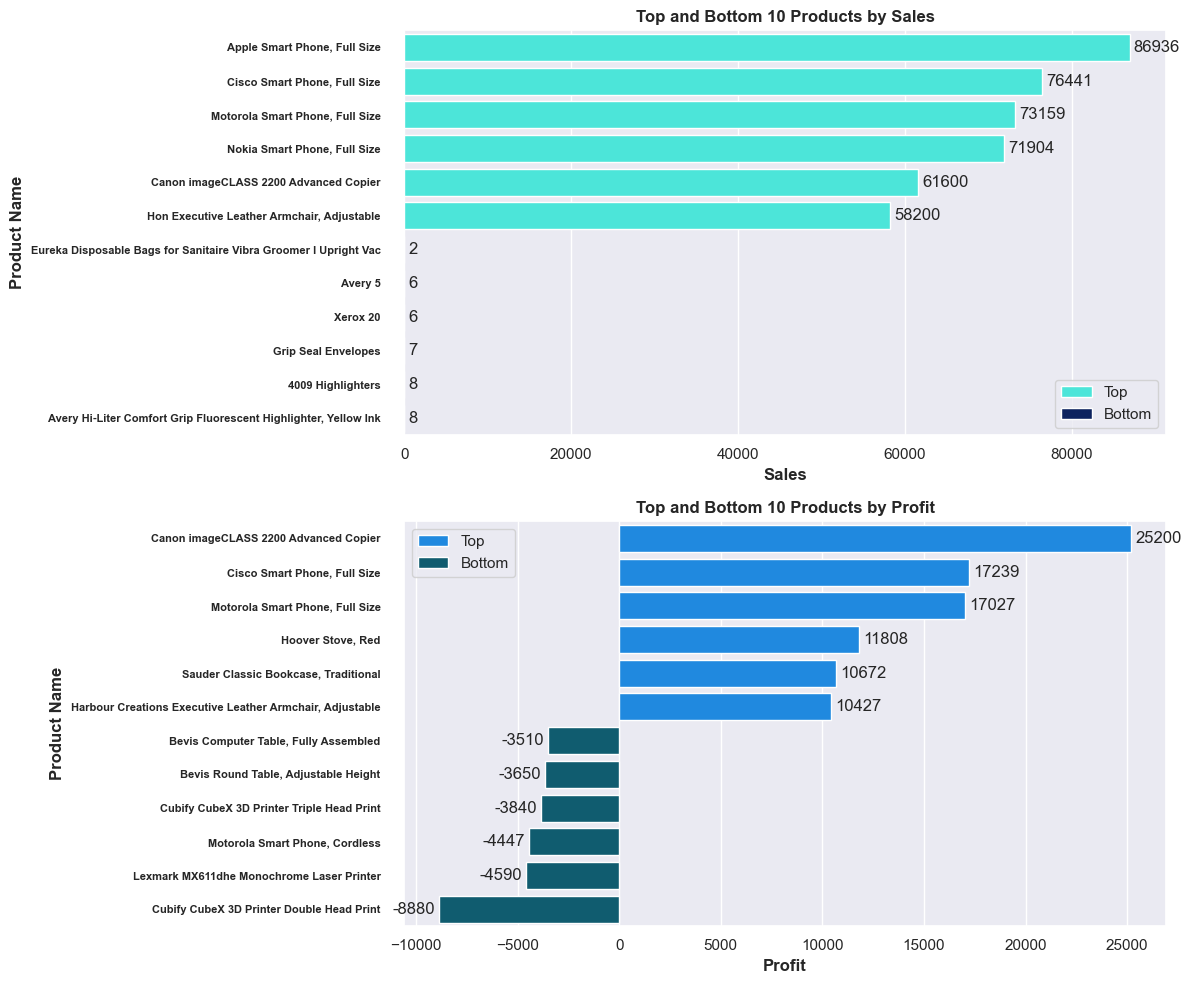

In [27]:
# Concatenate top and bottom for sales and profit
sales_combined = pd.concat([top_products_sales, bottom_products_sales], 
                          keys=['Top', 'Bottom'], names=['category'])
profit_combined = pd.concat([top_products_profit, bottom_products_profit[::-1]], 
                           keys=['Top', 'Bottom'], names=['category'])

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Combined Top and Bottom Products by Sales (Horizontal)
sales_df = sales_combined.reset_index()
sns.barplot(
    data=sales_df, y='product_name', x=sales_combined.values, hue='category',
    ax=axes[0], palette=["#32FFEE", "#001D6C"], orient='h'
)
axes[0].set_title("Top and Bottom 10 Products by Sales", fontweight='bold')
axes[0].set_xlabel('Sales', fontweight='bold')
axes[0].set_ylabel('Product Name', fontweight='bold')
axes[0].tick_params(axis='y', pad=11, labelsize=8)
axes[0].legend(title='Category')
legend = axes[0].legend()
legend.get_title().set_fontweight('bold')
for label in axes[0].get_yticklabels():  # Changed from xticklabels to yticklabels
    label.set_fontweight('bold')

# Plot 2: Combined Top and Bottom Products by Profit (Horizontal)
profit_df = profit_combined.reset_index()
sns.barplot(
    data=profit_df, y='product_name', x=profit_combined.values, hue='category',
    ax=axes[1], palette=["#008CFF", "#00657F"], orient='h'
)
axes[1].set_title("Top and Bottom 10 Products by Profit",fontweight='bold')
axes[1].set_xlabel('Profit',fontweight='bold')
axes[1].set_ylabel('Product Name',fontweight='bold')
axes[1].tick_params(axis='y', pad=11, labelsize=8)
axes[1].legend(title='Category')
legend = axes[1].legend()
legend.get_title().set_fontweight('bold')
for label in axes[1].get_yticklabels():  # Changed from xticklabels to yticklabels
    label.set_fontweight('bold')

# Add bar labels
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

- Top Products by Sale: `Apple Smart Phone`, `Cisco Smart Phone`, and `Motorola Smart Phone`.  
- Bottom Products by Sale: `Eureka Disposable Bags`, `Avery 5`, and `Xerox 20`.  
- Top Products by Profit: `Canon imageCLASS 2200 Advanced Copier`, `Cisco Smart Phone`, and `Motorola Smart Phone`.  
- Bottom Products by Profit: `Cubify CubeX 3D Printer Double Head Print`, `Lexmark MX611dhe Monochrome Laser Printer`, and `Motorola Smart Phone`.  

Average Price of Items: 29.50
Average Quantity ordered: 3.48


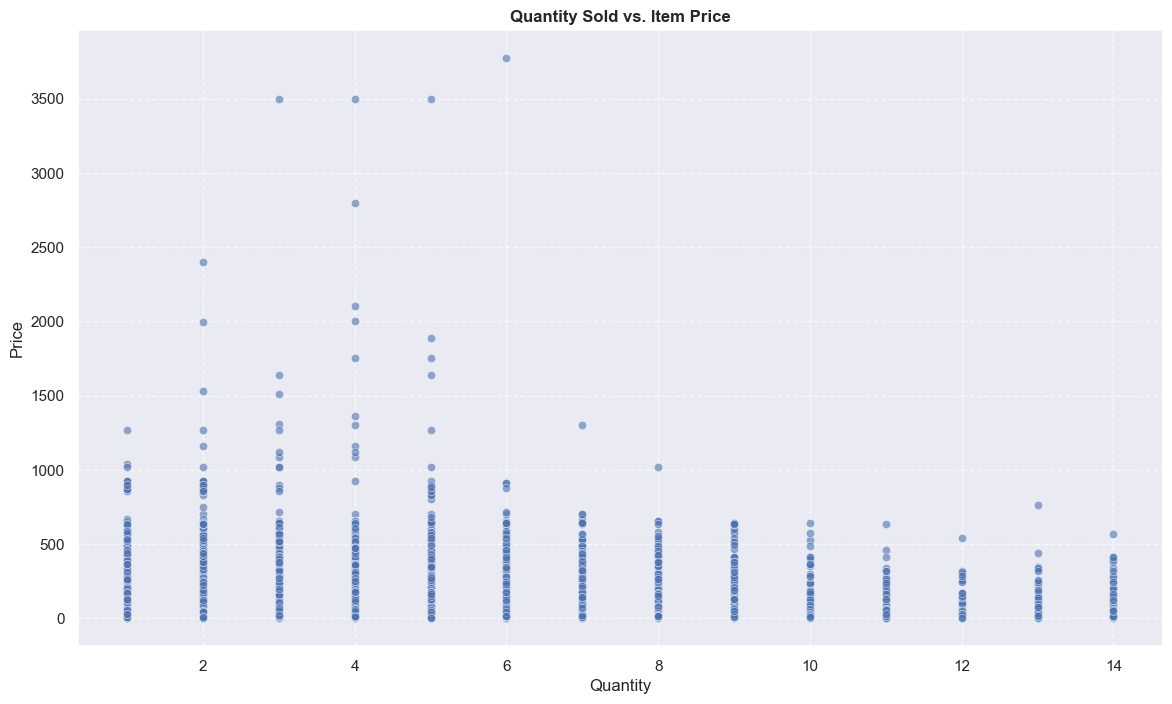

In [28]:
# What's the average Price of an item?

print(f"Average Price of Items: {df.price.median():.2f}")
print(f"Average Quantity ordered: {df.quantity.mean():.2f}")

sns.scatterplot(x='quantity', y='price', data=df, alpha=0.6)
plt.title('Quantity Sold vs. Item Price',fontweight='bold')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### <span style='color:#00FFFF'>**Geographical Insights**</span>

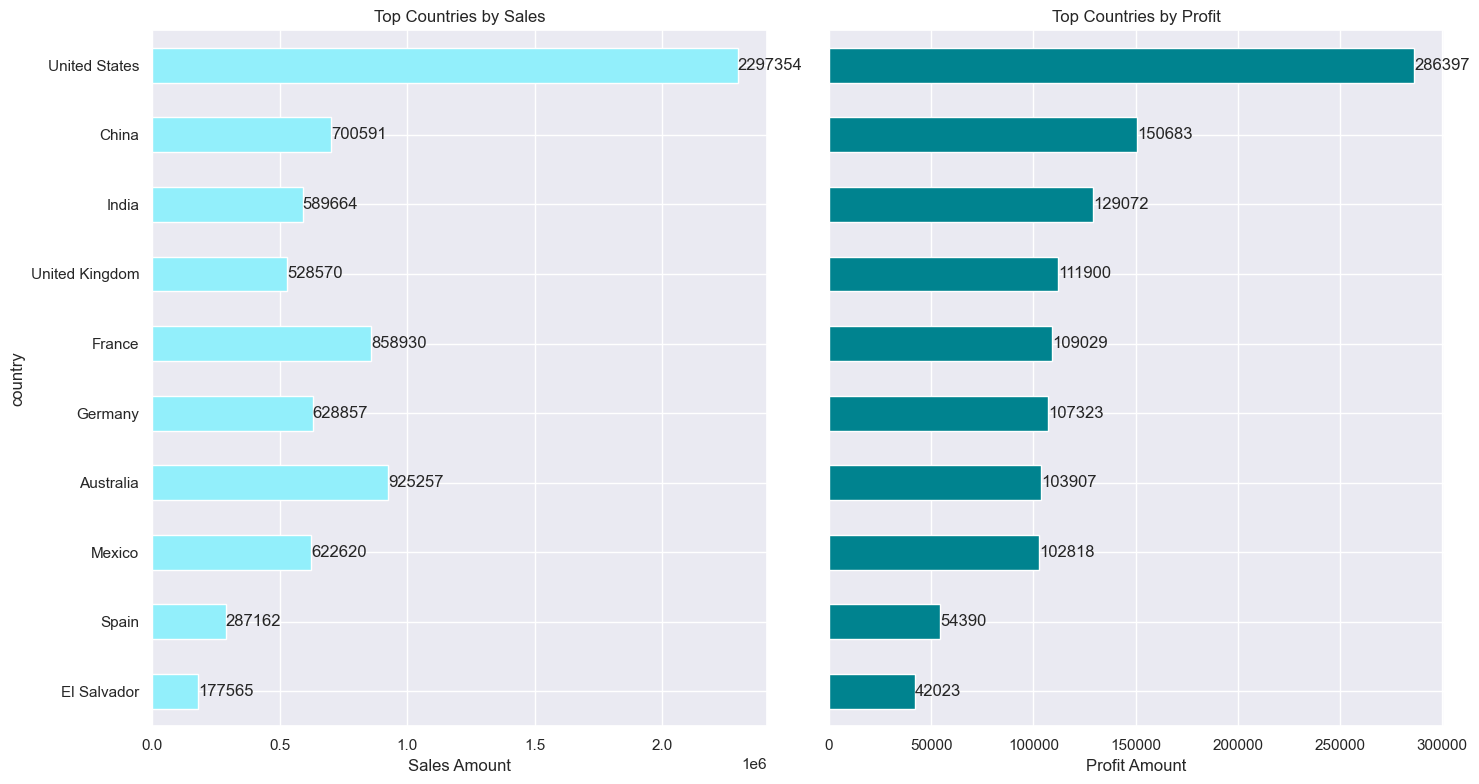

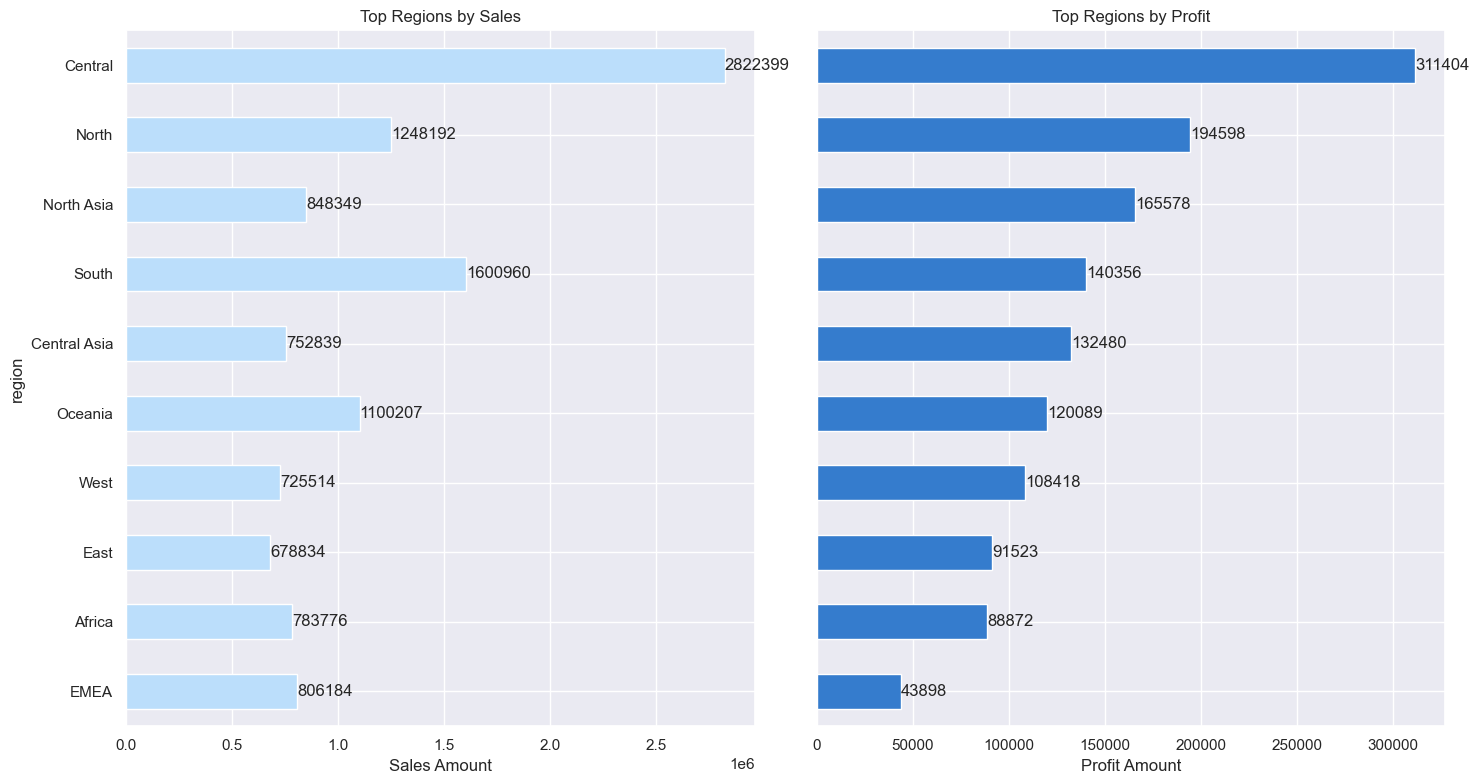

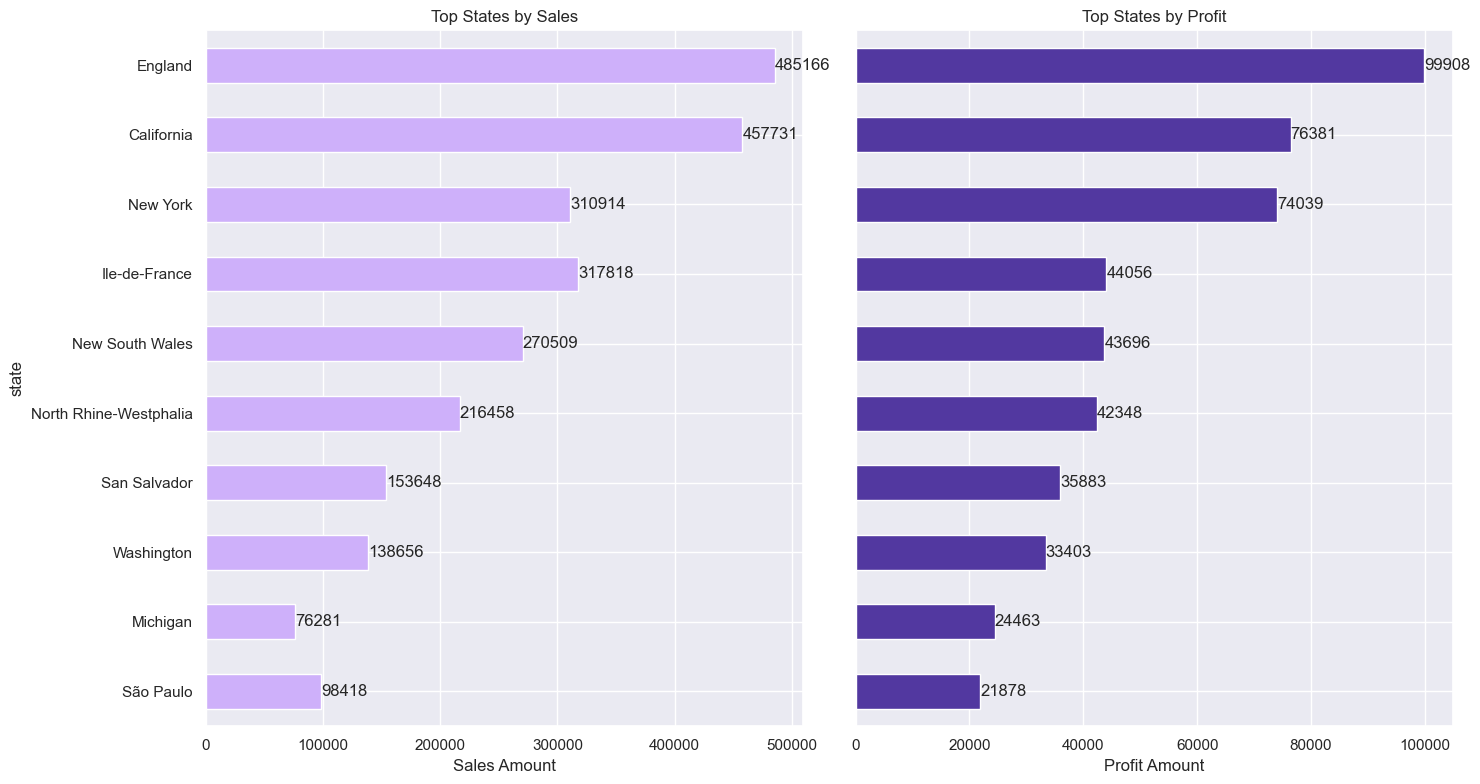

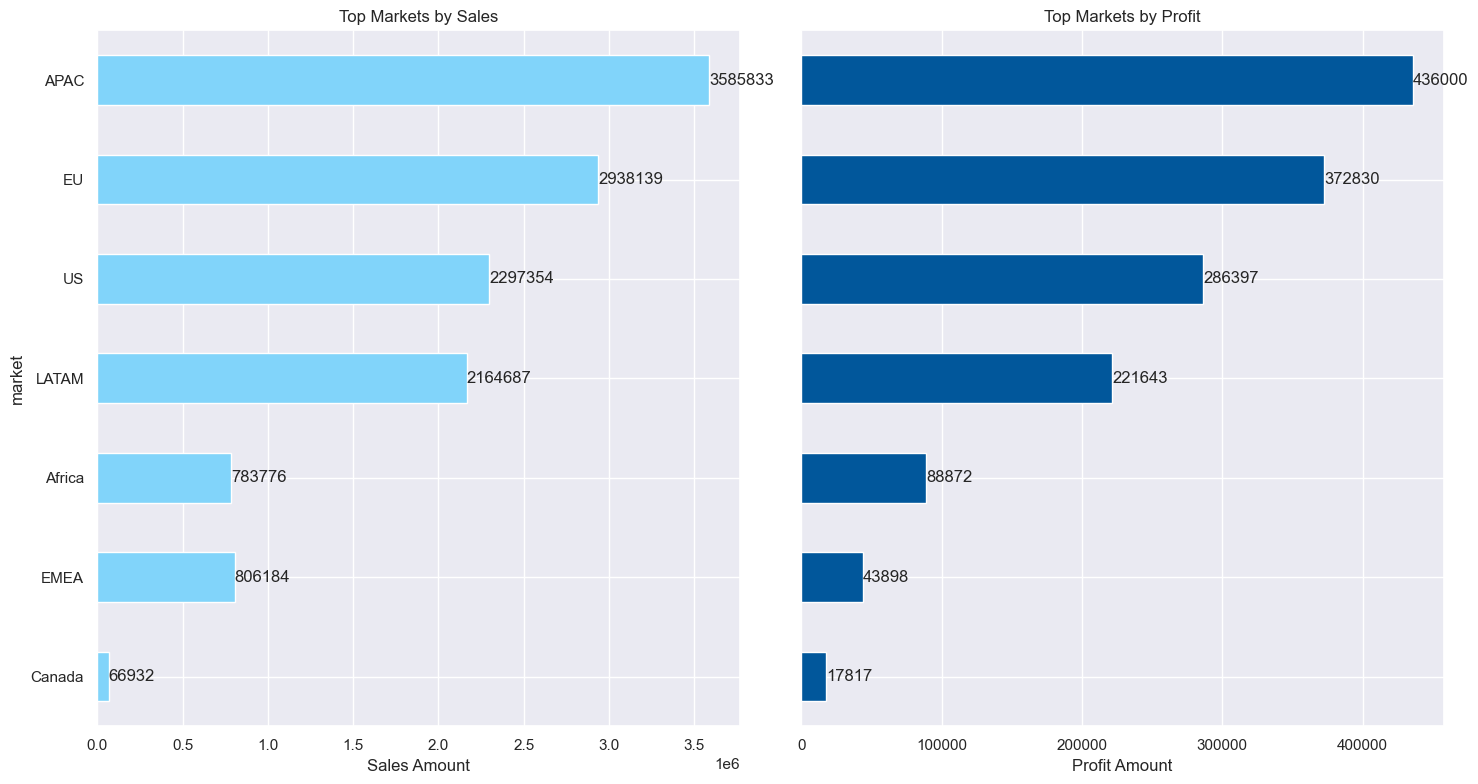

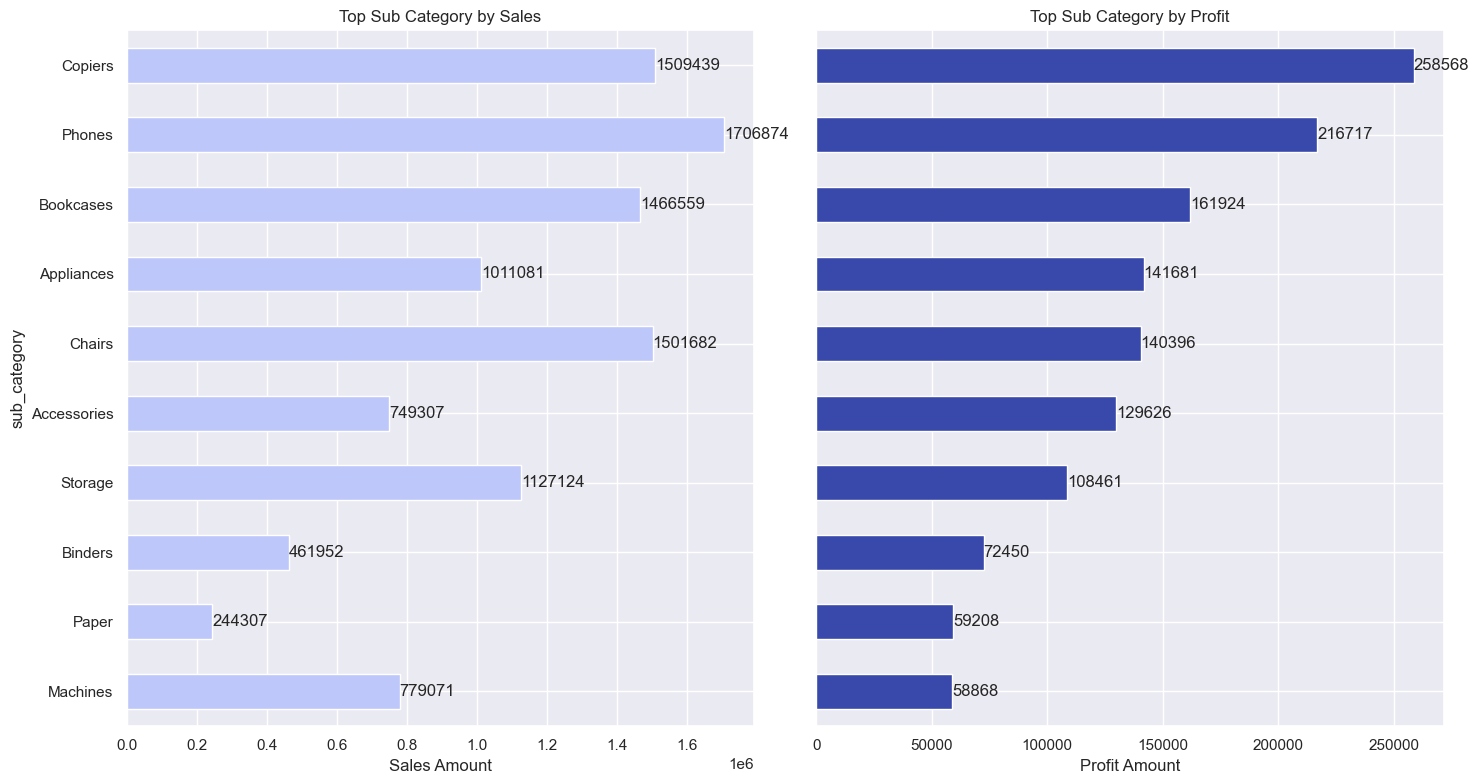

In [29]:
# Which country, region, or state generates the most sales and profit?

groups = ['country', 'region', 'state', 'market','sub_category']
titles = ['Countries', 'Regions', 'States', 'Markets','Sub Category']
colors =[("#92EFFB", "#00838F"), ("#BBDEFB", "#357CCD"),
          ("#CEB0FA", "#5238A0"), ("#81D4FA", "#01579B"),
          ("#BEC7F9", "#3949AB"), ("#7FE0ED", "#177e89")]

for i, (group, title, color_pair) in enumerate(zip(groups, titles, colors)):
    top_data = df.groupby(group)[['sales', 'profit']].sum()\
                .sort_values('profit', ascending=False).head(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
    
    # Left plot: Sales
    top_data['sales'].plot(kind='barh', ax=axes[0], color=color_pair[0])
    axes[0].set_title(f'Top {title} by Sales')
    axes[0].set_xlabel('Sales Amount')
    axes[0].invert_yaxis()
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.0f')
    
    # Right plot: Profit
    top_data['profit'].plot(kind='barh', ax=axes[1], color=color_pair[1])
    axes[1].set_title(f'Top {title} by Profit')
    axes[1].set_xlabel('Profit Amount')
    axes[1].invert_yaxis()
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt='%.0f')
    
    plt.tight_layout()
    plt.show()

- Top **Countries** by Profit: `United States`, `China`.
- Top **Countries** by Sales: `United States`, `Australia`.

- Top **Regions** by Profit: `Central`, `North`.
- Top **Regions** by Sales: `Central`, `South`.

- Top **States** by Sales & Profit: `England`, `EU`.

- Top **Markets** by Sales & Profit: `APAC`, `China`.

- Top **Sub Category** by Profit: `Copiers`, `Phones`.
- Top **Sub Category** by Sales: `Phones`, `Copiers`.

### <span style='color:#00FFFF'>**Operational Efficiency & Impact**</span>

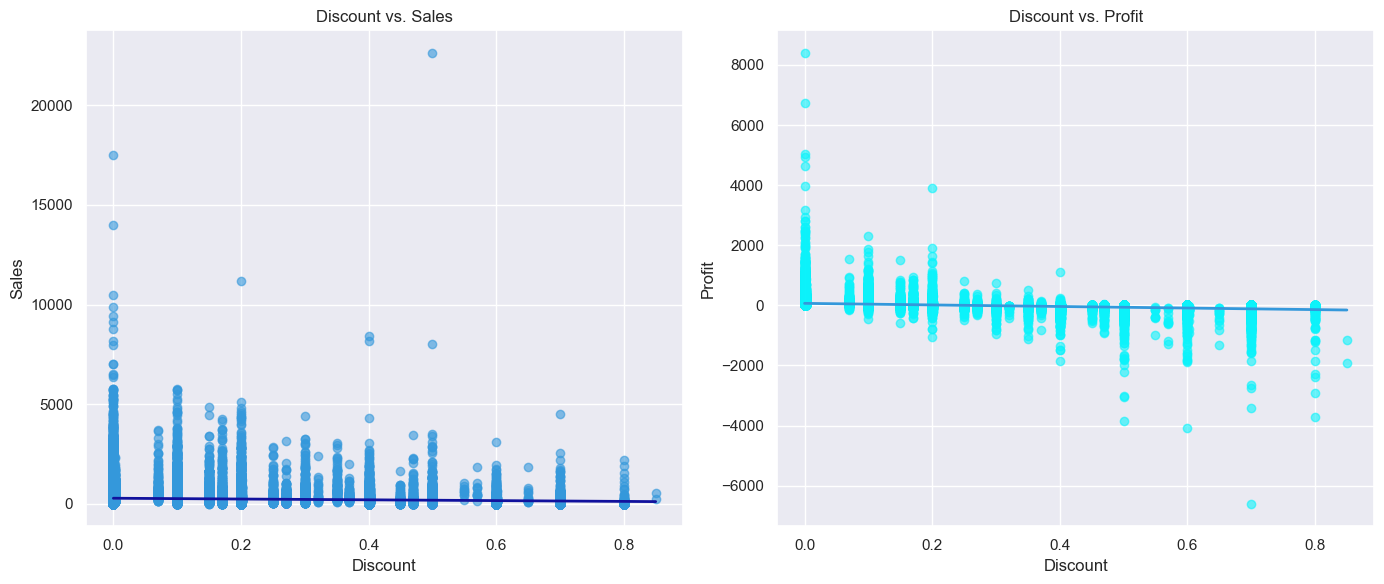

In [30]:
# What is the impact of discount on sales and profit? (Do higher discounts lead to more profit or just more sales?)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='discount', y='sales', data=df,
            scatter_kws={'alpha': 0.6, 'color': "#3498db"},
            line_kws={'color': '#11119d', 'lw': 2})
plt.title('Discount vs. Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.regplot(x='discount', y='profit', data=df,
            scatter_kws={'alpha': 0.6, 'color': "#0cf3fb"},
            line_kws={'color': '#3498db', 'lw': 2})
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

**Discount vs. Sales (Left):** Most orders have little to no discount (0-0.2 range). As discounts get bigger, fewer orders are placed. This shows the company doesn't give large discounts very often.

**Discount vs. Profit (Right):** Higher discounts mean lower profits. Orders with no discount make the most profit (up to $8,000), while big discounts (above 0.6) often lose money. Discounts above 0.2-0.3 start hurting profits badly.

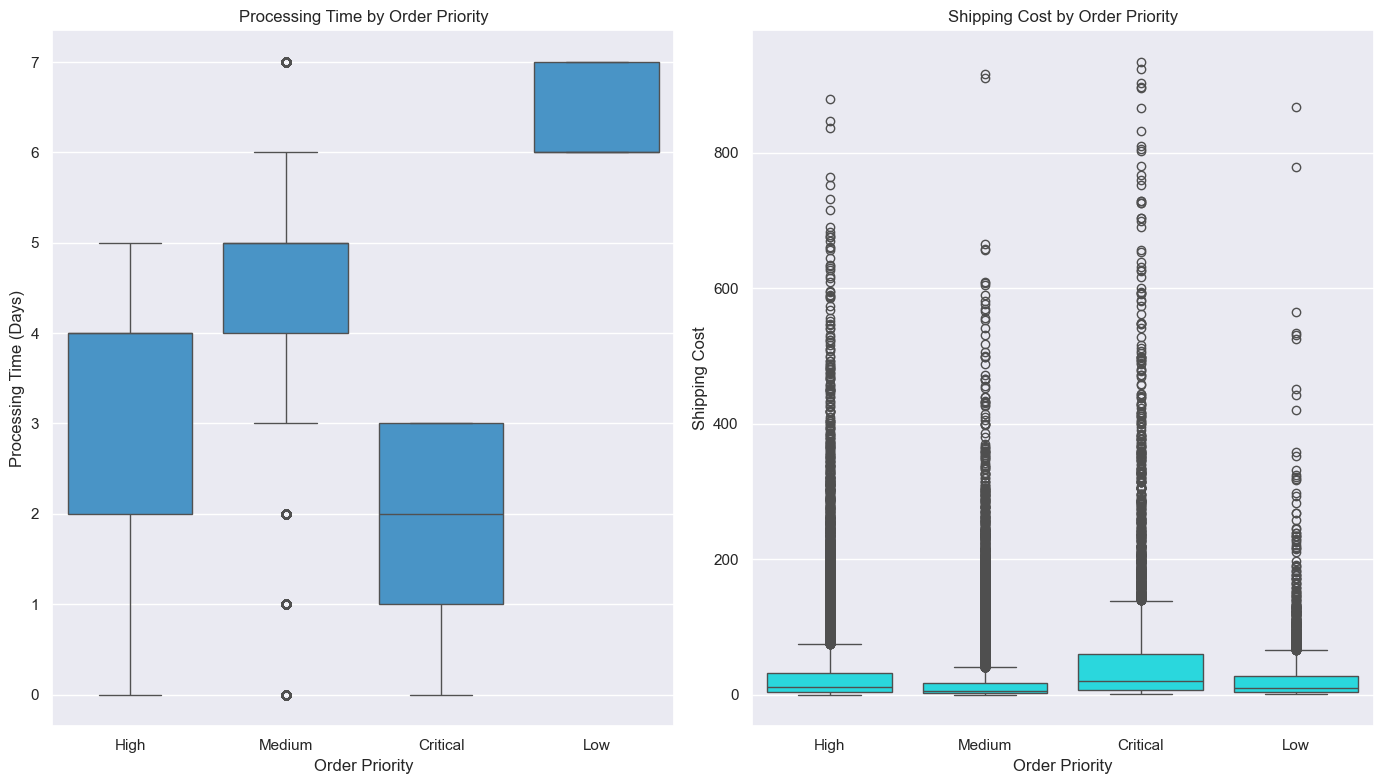

In [31]:
# Does order_priority affect shipping_duration or shipping_cost?

plt.subplot(1, 2, 1)
sns.boxplot(x='order_priority', y='shipping_duration', data=df, color='#3498db')
plt.title('Processing Time by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Processing Time (Days)')

plt.subplot(1, 2, 2)
sns.boxplot(x='order_priority', y='shipping_cost', data=df, color='#0cf3fb')
plt.title('Shipping Cost by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Shipping Cost')
plt.tight_layout()
plt.show()

**Processing Time (Left):** Low priority orders take longest (6-7 days), Critical orders are fastest (around 2 days). The company processes based on priority.

**Shipping Cost (Right):** Shipping costs are similar across all priorities (mostly under $200), with some expensive outliers up to $900. Priority doesn't heavily affect shipping cost.

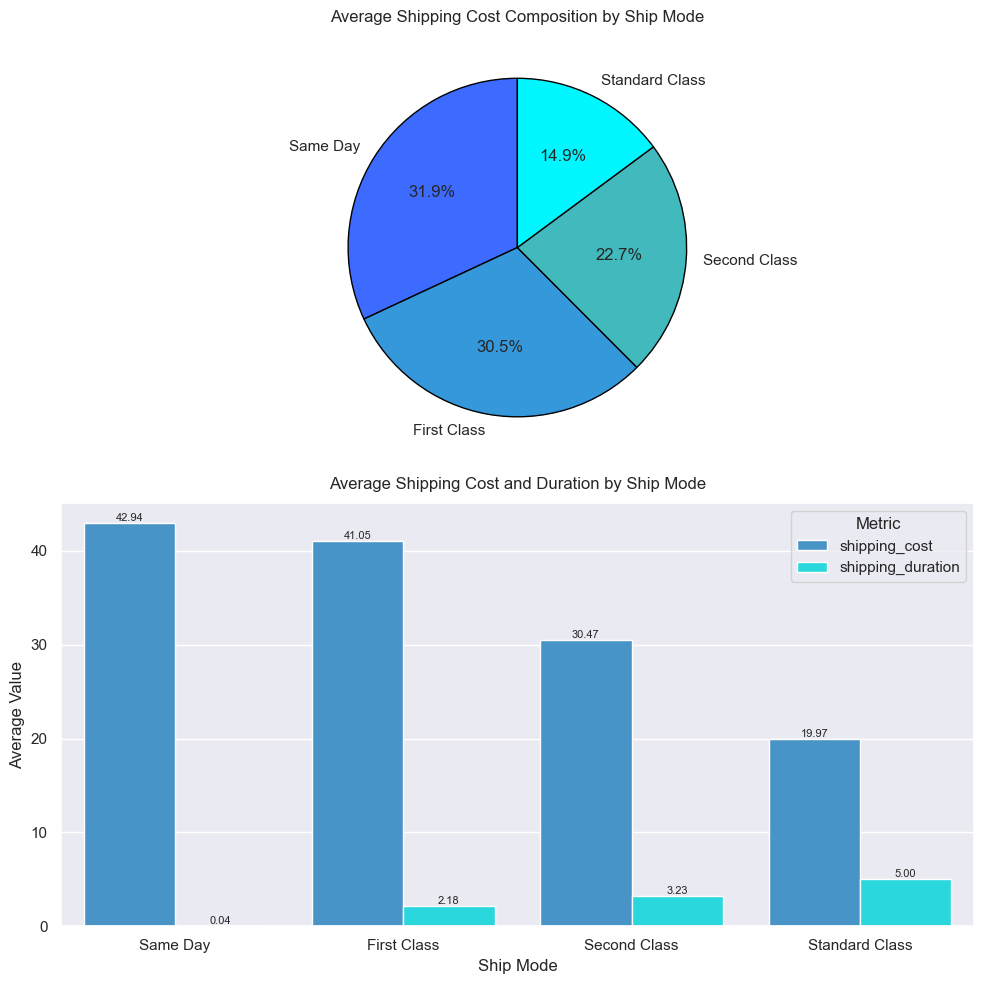

In [32]:
# How do different ship_modes compare in terms of shipping_cost and shipping_duration?

# Define colors (assuming 4 ship modes and 2 metrics)
pie_colors = pie_colors = ["#3E6BFF",'#3498db', "#41b9bd", "#00f7ff" ]
bar_palette = {'shipping_cost': '#3498db', 'shipping_duration': '#0cf3fb'}

# 1. Prepare and Sort Data: Calculate means and sort by 'shipping_cost'
shipping_data = df.groupby('ship_mode')[['shipping_cost', 'shipping_duration']]\
    .mean().sort_values(by='shipping_cost', ascending=False)
plot_data = shipping_data.reset_index()\
    .melt(id_vars='ship_mode', value_vars=['shipping_cost', 'shipping_duration'],
           var_name='Metric', value_name='Value')

# 2. Setup Figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# --- Plot 1 (Top): Average Shipping Cost Composition Pie Chart ---
shipping_data['shipping_cost'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90,
                                     colors=pie_colors, wedgeprops={'edgecolor': 'black'})
ax1.set_title('Average Shipping Cost Composition by Ship Mode', pad=10)
ax1.set_ylabel('') 

# --- Plot 2 (Bottom): Grouped Bar Chart (Cost vs Duration) ---
sns.barplot(data=plot_data, x='ship_mode', y='Value', hue='Metric', 
            ax=ax2, palette=bar_palette, order=shipping_data.index)
ax2.set_title('Average Shipping Cost and Duration by Ship Mode', pad=10)
ax2.set_ylabel('Average Value')
ax2.set_xlabel('Ship Mode')
ax2.tick_params(axis='x', rotation=0)

# Add labels to the grouped bars
for container in ax2.containers: 
    ax2.bar_label(container, fmt='{:,.2f}', label_type='edge', fontsize=8)

plt.tight_layout(); plt.show()

`Same Day` shipping takes up the biggest portion of total shipping costs (31.9%), followed closely by `First Class` (30.5%) and `Second Class` (22.7%). `Standard Class` is the smallest share (14.9%).

**Shipping Cost:** `Same Day` and `First Class` are most expensive (~$40), `Second Class` is mid-range (~$30), and `Standard Class` is cheapest (~$20).

**Shipping Duration:** `Standard Class` takes longest (~5 days), `Second Class` and `First Class` are faster (~3 and 2 days), while `Same Day` has almost no shipping time.

### <span style='color:#00FFFF'>**Correlation**</span>

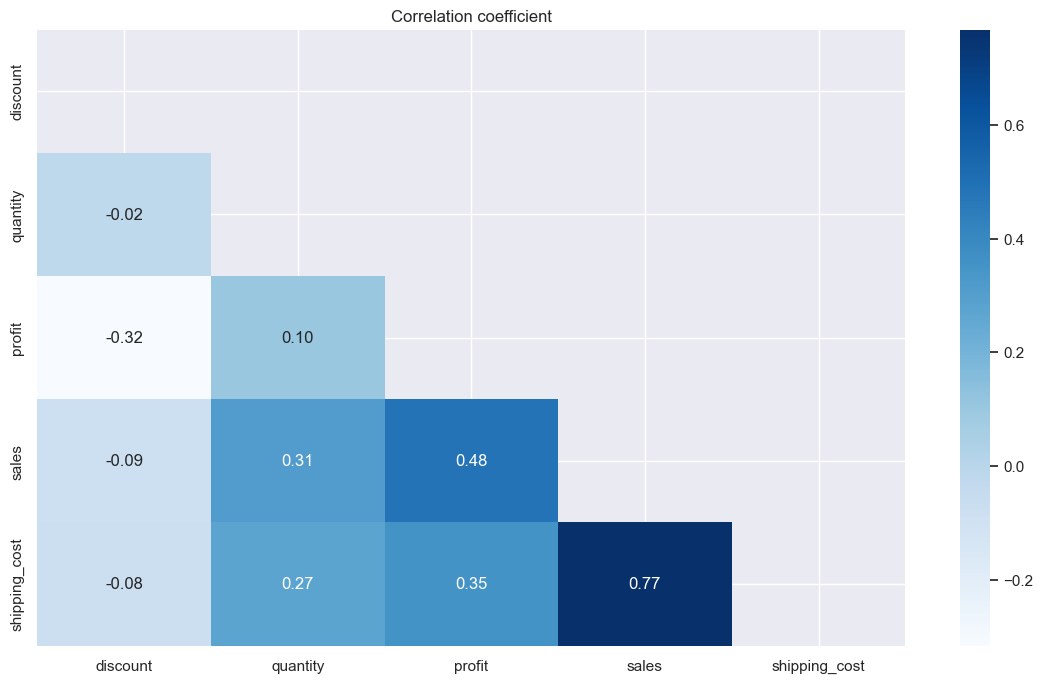

In [33]:
# Selecting columns to show correlation
for_corr = ['discount','quantity', 'profit', 'sales', 'shipping_cost',]

corr = df[for_corr].corr().iloc[:,:5]

mask_upper_triangle = np.triu(np.ones_like(corr, dtype=bool), k=0) 

sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', mask=mask_upper_triangle, cbar=True)
plt.title('Correlation coefficient')
plt.show()


The strongest relationship is between `sales` and `shipping_cost`.  
Moderate positive links appear between `sales–profit` and `quantity–sales`.  
There is a moderate negative correlation between `discount` and `profit`.  
Other pairs show weak or negligible correlations.

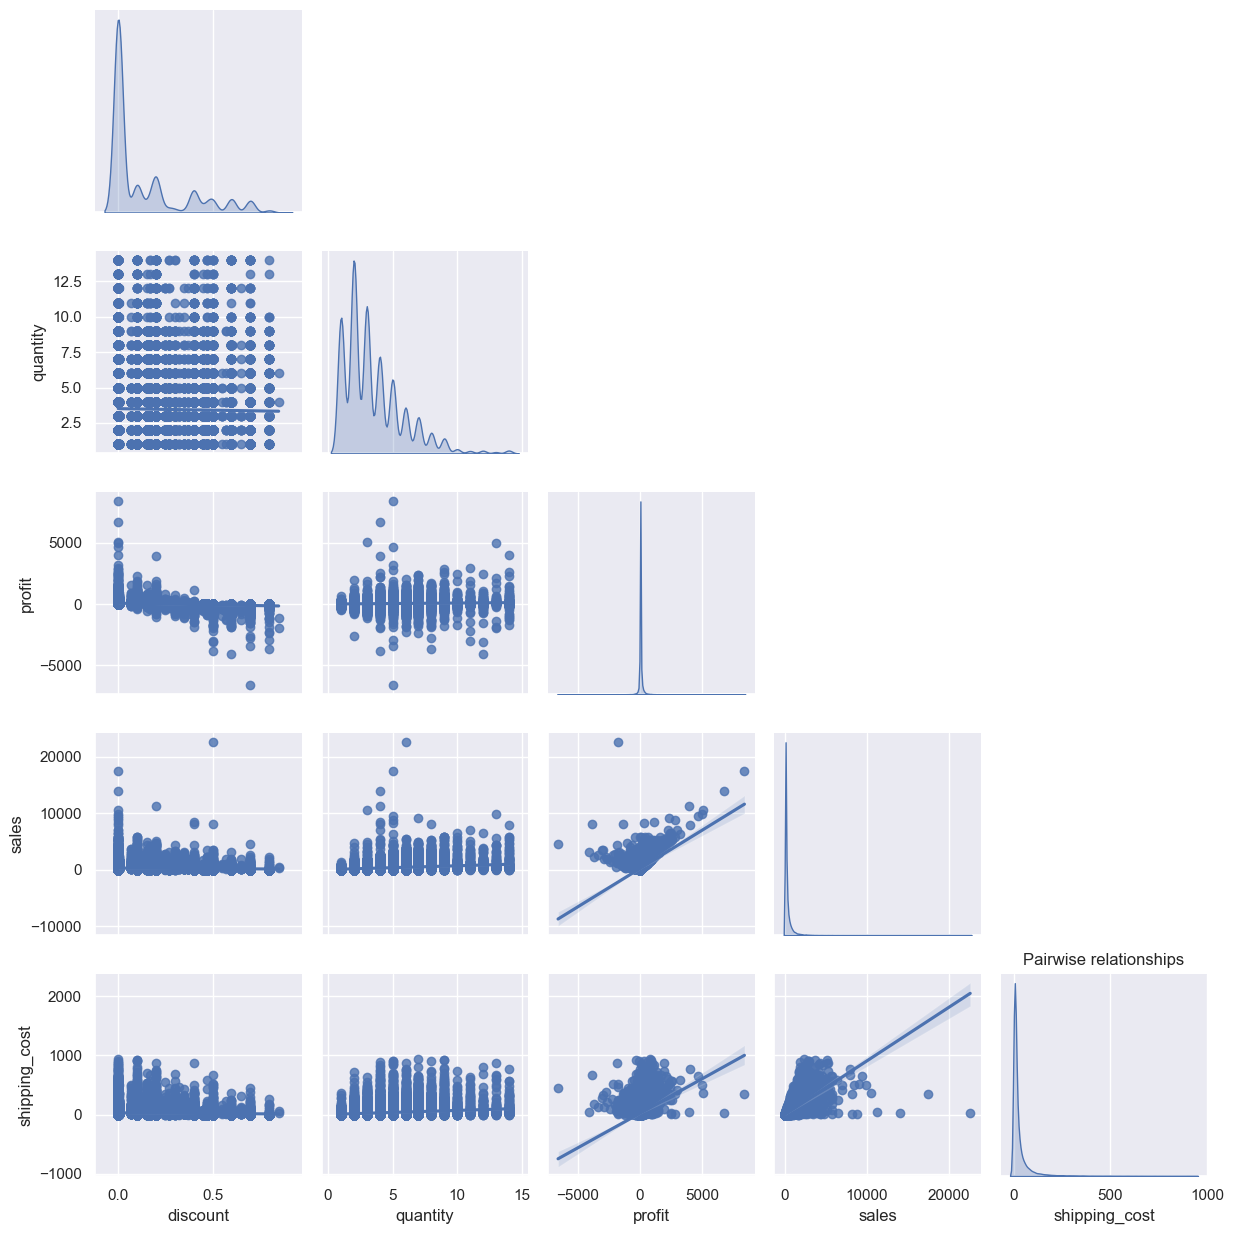

In [34]:
# Pairwise relationships
sns.pairplot(df[for_corr],kind='reg',diag_kind='kde',corner=True, palette='#00FFFF')
plt.title('Pairwise relationships')
plt.tight_layout()
plt.show();

In [35]:
# Export DataFrame to a CSV file
df.to_csv('superstore_processed.csv')

# <span style='color:#0096FF'>**Key Insights and Findings**</span>

### Overall Performance

* Total sales reached **12,642,905**, with total profit of **1,467,457.29**.
* The average profit margin stands at **4.72%**.
* Sales and profit show a **clear upward trend** across years and quarters.
* Average order processing time is **3.97 days**.

**What we suggest**

* We should focus on improving margins alongside growth, as revenue is increasing faster than profitability.
* Operational efficiency gains could further reduce processing time and improve customer experience.

### Customer & Ordering Behavior

* Top customers by **sales**: `SM-203204`, `TC-209804`.
* Top customers by **order count and quantity**: `SP-209202`, `CS-118451`.
* High revenue does not always mean many orders; for example, `SM-203204` leads in sales with only **5 large orders**.
* Most customers reorder within **one week** of a previous purchase.
* **25,784 orders** occur on the **same day**.
* Reordering peaks around **day 7–8**, then gradually declines after **30 days**.

**What we suggest**

* We should differentiate strategies for **high-value customers** versus **high-frequency customers**.
* Targeted follow-ups within the first week can reinforce repeat purchasing.

### Time-Based Patterns

* Most profitable days are **Thursday, Friday, and Monday**.
* **Saturday and Sunday** show noticeably lower profits.
* Sales and profit peak **mid-month**, with drops at the beginning and end of the month.

**What we suggest**

* We should align promotions and campaigns with high-performing weekdays and mid-month periods.
* Weekend-specific offers may help improve underperforming days.

### Segment & Product Performance

* Top segments by sales and profit: **Consumer**, **Corporate**, **Home Office**.
* Segment contribution to sales: **Consumer (51%)**, **Corporate (30%)**, **Home Office (18.3%)**.
* Top products by sales: **Apple Smart Phone**, **Cisco Smart Phone**.
* Bottom products by sales: **Eureka Disposable Bags**, **Avery 5**.
* Top products by profit: **Canon imageCLASS 2200**, **Cisco Smart Phone**.
* Bottom products by profit: **Cubify CubeX 3D Printer**, **Lexmark MX611dhe**.
* Average item price is **29.50**, with an average quantity of **3 items per order**.

**What we suggest**

* We should prioritize high-profit products and reassess or reprice low-profit items.
* The Consumer segment remains the main revenue driver and should be the core focus.

### Geographic Performance

* Top countries by profit: **United States, China**.
* Top countries by sales: **United States, Australia**.
* Top regions by profit: **Central, North**.
* Top regions by sales: **Central, South**.
* Best-performing markets: **APAC, China**.

**What we suggest**

* We should continue investing in high-performing regions while identifying margin improvements in high-sales, lower-profit areas.

### Discounts, Shipping & Logistics

* Higher discounts clearly lead to **lower profits**, while most orders receive little or no discount.
* Order priority has minimal impact on shipping cost.
* Shipping cost by class:

  * **Same Day / First Class:** highest (~$40)
  * **Second Class:** mid-range (~$30)
  * **Standard Class:** lowest (~$20)
* Shipping time:

  * **Same Day:** near zero
  * **First / Second Class:** ~2–3 days
  * **Standard Class:** ~5 days
* A strong relationship exists between **sales and shipping cost**.

**What we suggest**

* We should limit heavy discounting and use it strategically.
* Encouraging Standard or Second Class shipping can help control costs without major delivery trade-offs.
